# RayStation Bayesian Optimization Results

Ran the Bayesian optimization directly on RayStation rather than on grid search results.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import interpolate

## Optimization Results

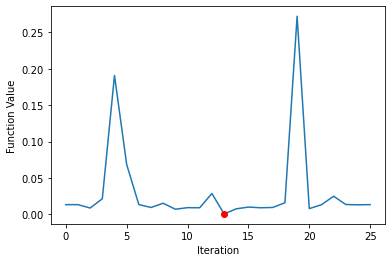

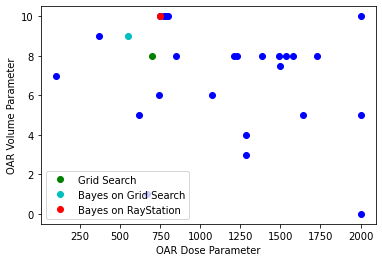

In [2]:
# Load results
func_vals = np.load('weight_75/func_vals.npy')
x = np.load('weight_75/x.npy')
x_iters = np.load('weight_75/x_iters.npy')

# Convergence
idx = np.argmin(func_vals)
plt.plot(func_vals)
plt.plot(idx, func_vals[idx], 'ro')
plt.xlabel('Iteration')
plt.ylabel('Function Value');

# Iterates
plt.figure()
plt.plot(700, 8, 'go', zorder=3)
plt.plot(548, 9, 'co', zorder=3)
plt.plot(x[0], x[1], 'ro', zorder=3)
for ii in range(len(x_iters)):
    plt.plot(x_iters[ii][0], x_iters[ii][1], 'bo')
plt.xlabel('OAR Dose Parameter')
plt.ylabel('OAR Volume Parameter')
plt.legend(['Grid Search', 'Bayes on Grid Search', 'Bayes on RayStation']);

## Optimal Values

In [3]:
# Approved plan
app_avg = 318.459
app_max = 6076.125

# Load results
oar_avg = np.load('weight_75/oar_avg.npy')
oar_avg_norm = np.load('weight_75/oar_avg_norm.npy')
ptv_max = np.load('weight_75/ptv_max.npy')
ptv_max_norm = np.load('weight_75/ptv_max_norm.npy')

# Print results
print(f'OAR: {oar_avg}, PTV: {ptv_max}')
print(f'OAR (norm): {oar_avg_norm}, PTV: {ptv_max_norm}')
print(f'OAR (app): {app_avg}, PTV (app): {app_max}')
print(f'OAR %: {100*(oar_avg_norm - app_avg)/app_avg}, PTV %: {100*(ptv_max_norm - app_max)/app_max}')

OAR: 263.77951624136034, PTV: 4910.86279296875
OAR (norm): 324.59833082066376, PTV: 6043.14501953125
OAR (app): 318.459, PTV (app): 6076.125
OAR %: 1.927824561611937, PTV %: -0.5427798221522764


## Dose-volume Histograms

Text(0, 0.5, 'Relative Volume (%)')

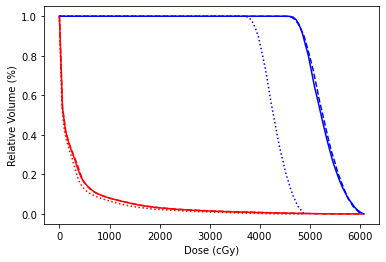

In [4]:
# Approved
dvh_dose_app = np.load('approved/dvh_doses_approved.npy')
dvh_oar_app = np.load('approved/dvh_oar_approved.npy')
dvh_ptv_app = np.load('approved/dvh_ptv_approved.npy')
plt.plot(dvh_dose_app, dvh_oar_app, 'r')
plt.plot(dvh_dose_app, dvh_ptv_app, 'b')

# Original
dvh_dose = np.load('weight_75/dvh_dose.npy')
dvh_oar = np.load('weight_75/dvh_oar.npy')
dvh_ptv = np.load('weight_75/dvh_ptv.npy')
plt.plot(dvh_dose, dvh_oar, 'r:')
plt.plot(dvh_dose, dvh_ptv, 'b:')

# Normalized
dvh_dose_norm = np.load('weight_75/dvh_dose_norm.npy')
dvh_oar_norm = np.load('weight_75/dvh_oar_norm.npy')
dvh_ptv_norm = np.load('weight_75/dvh_ptv_norm.npy')
plt.plot(dvh_dose_norm, dvh_oar_norm, 'r--')
plt.plot(dvh_dose_norm, dvh_ptv_norm, 'b--')

# Annotate
plt.xlabel('Dose (cGy)')
plt.ylabel('Relative Volume (%)')

## Compare

In [5]:
# Approved plan
print('Approved Plan')
print(f'Dose: 2000, Volume: 10, OAR: {app_avg}, PTV: {app_max}\n')

# Grid search
oar_grid = 305.3155093804993
ptv_grid = 6151.126953125
print('Grid Search')
print(f'Dose: 700, Volume: 8, OAR: {oar_grid:.3f}, PTV: {ptv_grid:.3f}, ' \
      f'OAR %: {100*(oar_grid - app_avg)/app_avg:.3f}, PTV %: {100*(ptv_grid - app_max)/app_max:.3f}\n')

# Bayes on grid search
oar_grid = 289.6000416906954
ptv_grid = 6219.94220703125
print('Bayes on Grid Search')
print(f'Dose: 548, Volume: 9, OAR: {oar_grid:.3f}, PTV: {ptv_grid:.3f}, ' \
      f'OAR %: {100*(oar_grid - app_avg)/app_avg:.3f}, PTV %: {100*(ptv_grid - app_max)/app_max:.3f}\n')

# Bayes on RayStation
oar_grid = oar_avg_norm
ptv_grid = ptv_max_norm
print('Bayes on RayStation')
print(f'Dose: {x[0]}, Volume: {x[1]}, OAR: {oar_grid:.3f}, PTV: {ptv_grid:.3f}, ' \
      f'OAR %: {100*(oar_grid - app_avg)/app_avg:.3f}, PTV %: {100*(ptv_grid - app_max)/app_max:.3f}\n')

Approved Plan
Dose: 2000, Volume: 10, OAR: 318.459, PTV: 6076.125

Grid Search
Dose: 700, Volume: 8, OAR: 305.316, PTV: 6151.127, OAR %: -4.127, PTV %: 1.234

Bayes on Grid Search
Dose: 548, Volume: 9, OAR: 289.600, PTV: 6219.942, OAR %: -9.062, PTV %: 2.367

Bayes on RayStation
Dose: 750, Volume: 10, OAR: 324.598, PTV: 6043.145, OAR %: 1.928, PTV %: -0.543



## Takeaway

My guess is that the weight parameter in the objective function (0.75) was  too high, so it prioritized decreasing the PTV max rather than decreasining the OAR average.

## Look at approximation to function

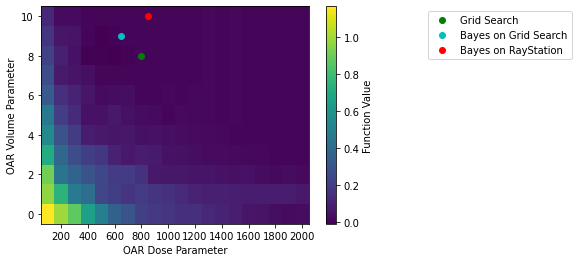

In [6]:
# Load results
oar_avg = np.load('5_28/oar_avg.npy')
ptv_d95 = np.load('5_28/ptv_d95.npy')
ptv_max = np.load('5_28/ptv_max.npy')
dvh_doses = np.load('5_28/dvh_doses.npy')
dvh_oar = np.load('5_28/dvh_oar.npy')
dvh_ptv = np.load('5_28/dvh_ptv.npy')

# Load normalized results
oar_avg_norm = np.load('5_28/oar_avg_norm.npy')
ptv_d95_norm = np.load('5_28/ptv_d95_norm.npy')
ptv_max_norm = np.load('5_28/ptv_max_norm.npy')
dvh_doses_norm = np.load('5_28/dvh_doses_norm.npy')
dvh_oar_norm = np.load('5_28/dvh_oar_norm.npy')
dvh_ptv_norm = np.load('5_28/dvh_ptv_norm.npy')

# Estimate missing data
idx = oar_avg_norm == -1
oar_avg_est = oar_avg_norm.copy()
oar_avg_est[idx] = 4800*oar_avg[idx]/ptv_d95[idx]
ptv_max_est = ptv_max_norm.copy()
ptv_max_est[idx] = 4800*ptv_max[idx]/ptv_d95[idx]

# Objective 
weight = 0.75
oar_change = (oar_avg_est - app_avg)/app_avg
ptv_change = (ptv_max_est - app_max)/app_max
objective = (1 - weight)*oar_change + weight*ptv_change

# Plot
plt.imshow(objective[1:, :].T, origin='lower')
plt.plot(7, 8, 'go', zorder=3)
plt.plot(5.48, 9, 'co', zorder=3)
plt.plot(x[0]/100, x[1], 'ro', zorder=3)
plt.xlabel('OAR Dose Parameter')
plt.ylabel('OAR Volume Parameter')
plt.xticks(np.arange(1, 21, 2), labels=np.arange(200, 2001, 200))
plt.axis('auto')
plt.colorbar(label='Function Value')
plt.legend(bbox_to_anchor=[2, 1], labels=['Grid Search', 'Bayes on Grid Search', 'Bayes on RayStation']);

In [7]:
# Turns out the Bayes on grid search was closest to the minimum of the estimated objective on the grid
np.unravel_index(np.argmin(objective, axis=None), objective.shape)

(5, 9)

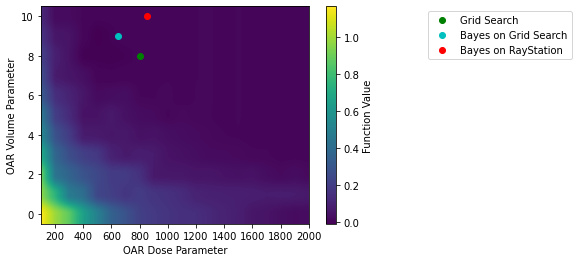

In [8]:
# Interpolate OAR average
volumes = np.arange(0, 11)
doses = np.arange(100, 2001, 100)
oar_avg_func = interpolate.interp2d(volumes, doses, oar_avg_est[1:, :])

# Interpolate PTV max
volumes = np.arange(0, 11)
doses = np.arange(100, 2001, 100)
ptv_max_func = interpolate.interp2d(volumes, doses, ptv_max_est[1:, :])

def obj_func(doses, volumes):
    weight = 0.75
    oar = oar_avg_func(volumes, doses)
    ptv = ptv_max_func(volumes, doses)
    return (1 - weight)*(oar - app_avg)/app_avg + weight*(ptv - app_max)/app_max

# Plot
objective_fine = obj_func(np.arange(100, 2001), np.arange(0, 11))

plt.imshow(objective_fine.T, origin='lower')
plt.plot(700, 8, 'go', zorder=3)
plt.plot(548, 9, 'co', zorder=3)
plt.plot(x[0], x[1], 'ro', zorder=3)
plt.xlabel('OAR Dose Parameter')
plt.ylabel('OAR Volume Parameter')
plt.xticks(np.arange(100, 2001, 200), labels=np.arange(200, 2001, 200))
plt.axis('auto')
plt.colorbar(label='Function Value')
plt.legend(bbox_to_anchor=[2, 1], labels=['Grid Search', 'Bayes on Grid Search', 'Bayes on RayStation']);

In [9]:
obj_func(700, 8) # estimated objective on grid search minimum

array([-0.00106025])

In [10]:
obj_func(548, 9) # estimated objective on Bayes on grid search minimum

array([-0.00490324])

In [11]:
obj_func(x[0], x[1]) # estimated objective on bayes on RayStation minimum

array([0.00683401])

In [12]:
min(func_vals) # true objective on Bayes on RayStation

0.0007487233932730866

In [13]:
# Bayes on grid search was closest to the minimum of the estimated objective on the finer grid
np.unravel_index(np.argmin(objective_fine, axis=None), objective_fine.shape)

(400, 9)

## Other comments

The weight was tuned to get a good result on the estimated objective grid, but it doesn't seem to do as well on the true function. Of course, we don't actually know what the landscape of the true function looks like either. 

I could try tuning that weight, though the whole point is to avoid tuning parameters! 

Since it only takes an hour, I can try again for the weight = 0.5 and 0.25, why not?